In [16]:
# from requests import Session
# from zeep import Client
# from zeep.transports import Transport

In [17]:
# session = Session()
# session.verify = '../br.gov.bcb.wildcard-2017.crt'
# transport = Transport(session=session)
# client = Client(
#     'https://www3.bcb.gov.br/sgspub/JSP/sgsgeral/FachadaWSSGS.wsdl',
#     transport=transport)

In [18]:
import numpy as np
import pandas as pd
from pandas import Series
import statsmodels.api as sm
import quandl
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#from statsmodels.graphics.tsaplots import plot_acf

In [19]:
df = pd.read_csv('./serie_deflacionada_igpm.csv')

In [20]:
presidentes = pd.read_csv('../presidentes/presidentes.csv')
cafe_usd = pd.read_csv('../CEPEA-COFFEE_A.csv')
cafe_usd = pd.read_csv('../CEPEA-COFFEE_A.csv')

In [21]:
GOOG = pd.read_csv('../stocks/GOOG.csv')
AAPL = pd.read_csv('../stocks/AAPL.csv')
NFLX = pd.read_csv('../stocks/NFLX.csv')
AMZN = pd.read_csv('../stocks/AMZN.csv')

In [22]:
indices_economicos_br = pd.read_csv('../STI-20180617152617216.csv', sep=';')

In [23]:
data_idx_econ_br = [
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27574 - COMMODITY INDEX - BRAZIL - INDEX'],
        name='col_1'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27575 - COMMODITY INDEX - BRAZIL - AGRICULTURE - INDEX'],
        name='AGRICULTURA'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27576 - COMMODITY INDEX - BRAZIL - METAL - INDEX'],
        name='METAL'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27577 - COMMODITY INDEX - BRAZIL - ENERGY - INDEX'],
        name='ENERGIA'
    )
]

layout = go.Layout(
    title='BRAZILIAN ECONOMIC COMMODITY INDEX',
    yaxis=dict(title='Preço'),
    xaxis=dict(title='Tempo')
)

fig = go.Figure(data=data_idx_econ_br, layout=layout)
py.iplot(fig, filename='file_data_idx_econ_br')

-------

In [24]:
##
gas_defl = df[df.PRODUTO == 'GASOLINA']
diesel_defl = df[df.PRODUTO == 'OLEO_DIESEL']
etanol_defl = df[df.PRODUTO == 'ETANOL_HIDRATADO']
gnv_defl = df[df.PRODUTO == 'GNV']

data_nDefl = [
    go.Scatter(
        x=gas_defl['MES'], # assign x as the dataframe column 'x'
        y=gas_defl['PRECO_MEDIO_REVENDA'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel_defl['MES'], # assign x as the dataframe column 'x'
        y=diesel_defl['PRECO_MEDIO_REVENDA'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol_defl['MES'], # assign x as the dataframe column 'x'
        y=etanol_defl['PRECO_MEDIO_REVENDA'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv_defl['MES'], # assign x as the dataframe column 'x'
        y=gnv_defl['PRECO_MEDIO_REVENDA'],
        name='GNV'
    )
]

#
layout_nDefl = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis. Sem Correção para Inflação',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Data')
)

#
fig_nDefl = go.Figure(data = data_nDefl, layout = layout_nDefl)

#
py.iplot(fig_nDefl, filename='line-plot-title_nDefl')

-----

In [25]:
##
gas = df[df.PRODUTO == 'GASOLINA']
diesel = df[df.PRODUTO == 'OLEO_DIESEL']
etanol = df[df.PRODUTO == 'ETANOL_HIDRATADO']
gnv = df[df.PRODUTO == 'GNV']

data = [
    go.Scatter(
        x=gas['MES'], # assign x as the dataframe column 'x'
        y=gas['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel['MES'], # assign x as the dataframe column 'x'
        y=diesel['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol['MES'], # assign x as the dataframe column 'x'
        y=etanol['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv['MES'], # assign x as the dataframe column 'x'
        y=gnv['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='GNV'
    )
]

#
layout = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis. Inflação do Período Corrigida pelo Índice IGP-M para data de ___/___/___',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Data')
)

#
fig = go.Figure(data=data, layout=layout)

#
py.iplot(fig, filename='line-plot-title')

----

In [26]:
#
# etanol_series = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
# tmp = sm.tsa.stattools.acf(etanol_series, nlags=200)
# auto_corr_etanol = np.array(tmp)]
# #
# gasolina_series = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
# tmp2 = sm.tsa.stattools.acf(gasolina_series, nlags=200)
# auto_corr_gasolina = np.array(tmp2)

In [27]:
#
nLAGS = 200
#
etanol_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA)
tmp_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(etanol_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_etanol_autocorr_fuels_no_monetary_correction = np.array(tmp_autocorr_fuels_no_monetary_correction)
#

gasolina_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA)
tmp2_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(gasolina_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_gasolina_autocorr_fuels_no_monetary_correction = np.array(tmp2_autocorr_fuels_no_monetary_correction)


#
diesel_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'OLEO_DIESEL'].PRECO_MEDIO_REVENDA)
tmp3_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(diesel_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_diesel_autocorr_fuels_no_monetary_correction = np.array(tmp3_autocorr_fuels_no_monetary_correction)


#
data_auto_corr_fuels_no_monetary_correction = [
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_etanol_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_etanol_autocorr_fuels_no_monetary_correction,
        name = 'Etanol'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_gasolina_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_gasolina_autocorr_fuels_no_monetary_correction,
        name = 'Gasolina'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_diesel_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_diesel_autocorr_fuels_no_monetary_correction,
        name = 'Diesel'
    )
    
]

#
layout_autocorr_fuels_no_monetary_correction = go.Layout(
    title='Função de Autorrelação para Série Histórica de Combustíveis. Nenhuma Correção Monetária Aplicada',
    yaxis=dict(title='Índice de Autocorrelação'),
    xaxis=dict(title='LAG')
)

fig_autocorr_fuels_no_monetary_correction = go.Figure(data = data_auto_corr_fuels_no_monetary_correction, layout = layout_autocorr_fuels_no_monetary_correction)
py.iplot(fig_autocorr_fuels_no_monetary_correction, filename='file_autocorr_fuels_no_monetary_correction')

In [28]:
#
nLAGS = 200
#
etanol_series = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp = sm.tsa.stattools.acf(etanol_series, nlags=nLAGS)
auto_corr_etanol = np.array(tmp)
#

gasolina_series = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp2 = sm.tsa.stattools.acf(gasolina_series, nlags=nLAGS)
auto_corr_gasolina = np.array(tmp2)


#
diesel_series = pd.Series(df[df.PRODUTO == 'OLEO_DIESEL'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp3 = sm.tsa.stattools.acf(diesel_series, nlags=nLAGS)
auto_corr_diesel = np.array(tmp3)


#
data_auto_corr = [
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_etanol.size),
        y = auto_corr_etanol,
        name = 'Etanol'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_gasolina.size),
        y = auto_corr_gasolina,
        name = 'Gasolina'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_diesel.size),
        y = auto_corr_diesel,
        name = 'Diesel'
    )
    
]

#
layout_data_auto_corr = go.Layout(
    title='Função de Autorrelação para Série Histórica de Combustíveis. Inflação do Período Corrigida pelo Índice IGP-M para data de ___/___/___',
    yaxis=dict(title='AUTORRELATION INDEX'),
    xaxis=dict(title='LAG')
)

fig = go.Figure(data = data_auto_corr, layout = layout_data_auto_corr)
py.iplot(fig, filename='file_autocorr_fuels_igp_m_monetary_correction')

In [16]:
# pd.plotting.autocorrelation_plot(serie_etanol);
# pd.plotting.autocorrelation_plot(gaso);
# pd.plotting.autocorrelation_plot(diesilo);

-----

In [117]:
#
t = np.linspace(0, 1, nLAGS)

fft_etanol = np.abs(np.fft.fft(auto_corr_etanol))**2

freq = np.fft.fftfreq(t.shape[-1])

In [118]:
#
dd = [
        go.Scatter(
        x = t,
        y = fft_etanol,
        name = 'FFT Etanol'
     )
]


#
ddl = go.Layout(
    title='FFT',
    yaxis=dict(title='Frequência'),
    xaxis=dict(title='Intensidade (unids arbitrárias)')
)


#
fig_ = go.Figure(data = dd, layout=ddl)
py.iplot(fig_, filename='ddfft_file_data_idx_econ_br')

In [128]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt

dt = 0.001
X = fft(etanol['PRECO_MEDIO_REVENDA'])
freq = fftfreq(X.size, d=dt)

# Only keep positive frequencies.
keep = freq>=0
X = X[keep]
freq = freq[keep]


In [129]:
dd = [
        go.Scatter(
        x = freq,
        y = fft_etanol,
        name = 'FFT Etanol'
     )
]


#
ddl = go.Layout(
    title='FFT',
    yaxis=dict(title='Frequência'),
    xaxis=dict(title='Intensidade (unids arbitrárias)')
)


#
fig_ = go.Figure(data = dd, layout=ddl)
py.iplot(fig_, filename='ddfft_file_data_idx_econ_br')

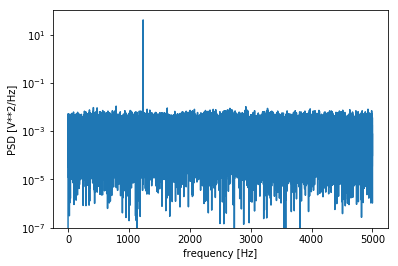

In [127]:
from scipy import signal
import matplotlib.pyplot as plt


fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)


f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()